# PEC 2:  implementación y evaluación de una red neuronal basada en capas densas para la clasificación de las 5 clases

### Raúl Pérez Prats
### 05/05/2024

## Tabla de Contenidos

### 1. [Cargar los datos](#1)
### 2. [Realizar un estudio exploratiorio de los datos](#2)
### 3. [Normalizar las expresiones con la transformación minmax](#3)
### 4. [Separar los datos en train (2/3) y test (1/3)](#4)
### 5. [Definir el modelo 1](#5)
### 6. [Ajustar el modelo 1 con un 20% de validacion](#6)
### 7. [Obtener la tabla de clasificación errónea en test](#7)
### 8. [Definir el modelo 2](#8)
### 9. [Ajustar el modelo 2 con un 20% de validación](#9)
### 10. [Comparar en test, mediante las métricas de evaluación, los dos modelos](#10)

## 1. Cargar los datos <a class="anchor" id="1"></a>

In [165]:
import tensorflow as tf
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('Blood_samples_dataset_19.csv')
print(df.shape)
df

(2351, 19)


,Glucose,Cholesterol,Hemoglobin,Platelets,Mean.Corpuscular.Volume,Mean.Corpuscular.Hemoglobin.Concentration,Insulin,BMI,Systolic.Blood.Pressure,Diastolic.Blood.Pressure,Triglycerides,HbA1c,LDL.Cholesterol,AST,Heart.Rate,Creatinine,Troponin,C.reactive.Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.631045,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.307553,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.295122,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.668719,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.442159,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.177502,0.684499,0.883908,0.257120,0.102022,0.356098,0.928344,0.670665,0.311568,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.341056,0.309766,0.525230,0.558362,0.741009,0.678500,0.299213,0.491185,0.701914,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.543017,0.838722,0.788944,0.660676,0.597290,0.663382,0.572330,0.141738,0.155871,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.136227,0.279219,0.078163,0.411167,0.355545,0.114380,0.191626,0.570553,0.171245,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


Tenemos un dataset de 2351 muestras con 19 variables

## 2. Realizar un estudio exploratiorio de los datos <a class="anchor" id="2"></a>

In [167]:
df.head() # Printamos las top 5 primeras filas

,Glucose,Cholesterol,Hemoglobin,Platelets,Mean.Corpuscular.Volume,Mean.Corpuscular.Hemoglobin.Concentration,Insulin,BMI,Systolic.Blood.Pressure,Diastolic.Blood.Pressure,Triglycerides,HbA1c,LDL.Cholesterol,AST,Heart.Rate,Creatinine,Troponin,C.reactive.Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.631045,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.307553,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.295122,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.668719,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.442159,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [168]:
df.tail() # Printamos las últimas 5 filas

,Glucose,Cholesterol,Hemoglobin,Platelets,Mean.Corpuscular.Volume,Mean.Corpuscular.Hemoglobin.Concentration,Insulin,BMI,Systolic.Blood.Pressure,Diastolic.Blood.Pressure,Triglycerides,HbA1c,LDL.Cholesterol,AST,Heart.Rate,Creatinine,Troponin,C.reactive.Protein,Disease
2346,0.012956,0.336925,0.451218,0.175006,0.177502,0.684499,0.883908,0.257120,0.102022,0.356098,0.928344,0.670665,0.311568,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.341056,0.309766,0.525230,0.558362,0.741009,0.678500,0.299213,0.491185,0.701914,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.543017,0.838722,0.788944,0.660676,0.597290,0.663382,0.572330,0.141738,0.155871,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.136227,0.279219,0.078163,0.411167,0.355545,0.114380,0.191626,0.570553,0.171245,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes
2350,0.032726,0.053596,0.102633,0.221356,0.608940,0.450700,0.288485,0.581466,0.710744,0.407323,0.060230,0.188750,0.331887,0.099538,0.982893,0.437285,0.288961,0.709262,Anemia


In [169]:
df.describe() # Summary del dataset

,Glucose,Cholesterol,Hemoglobin,Platelets,Mean.Corpuscular.Volume,Mean.Corpuscular.Hemoglobin.Concentration,Insulin,BMI,Systolic.Blood.Pressure,Diastolic.Blood.Pressure,Triglycerides,HbA1c,LDL.Cholesterol,AST,Heart.Rate,Creatinine,Troponin,C.reactive.Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.492200,0.562273,0.447062,0.436679,0.381211,0.421708,0.374373,0.439112,0.421777,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.275735,0.273281,0.242861,0.242865,0.232785,0.248768,0.256981,0.263779,0.252124,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.046942,0.006947,0.034129,0.014596,0.005988,0.005579,0.005217,0.016256,0.033037,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.287532,0.355774,0.219111,0.246885,0.179951,0.175469,0.184604,0.188750,0.217757,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.453052,0.603635,0.444806,0.443725,0.359064,0.474378,0.317857,0.466375,0.413071,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.722293,0.741381,0.654441,0.601662,0.580903,0.663382,0.572330,0.652514,0.604753,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.995263,0.975586,0.966784,0.898210,0.829100,0.934617,0.973679,0.950218,0.983826,0.994460,0.996873,0.925924,0.972803,0.797906


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   Mean.Corpuscular.Volume                    2351 non-null   float64
 5   Mean.Corpuscular.Hemoglobin.Concentration  2351 non-null   float64
 6   Insulin                                    2351 non-null   float64
 7   BMI                                        2351 non-null   float64
 8   Systolic.Blood.Pressure                    2351 non-null   float64
 9   Diastolic.Blood.Pressure                   2351 non-null   float64
 10  Triglycerides           

Todas las variables contienen sus valores en el rango (0,1), por lo tanto no será necesario normalizarlas y reescalarlas.
La variable disease es la única variable categórica y por lo tanto tendremos que usar un one hot encoding para introducirla a la red neuronal.

In [171]:
nan_total = df.isna().any().any() # Verificamos la existencia de valores nulos
nan_total

False

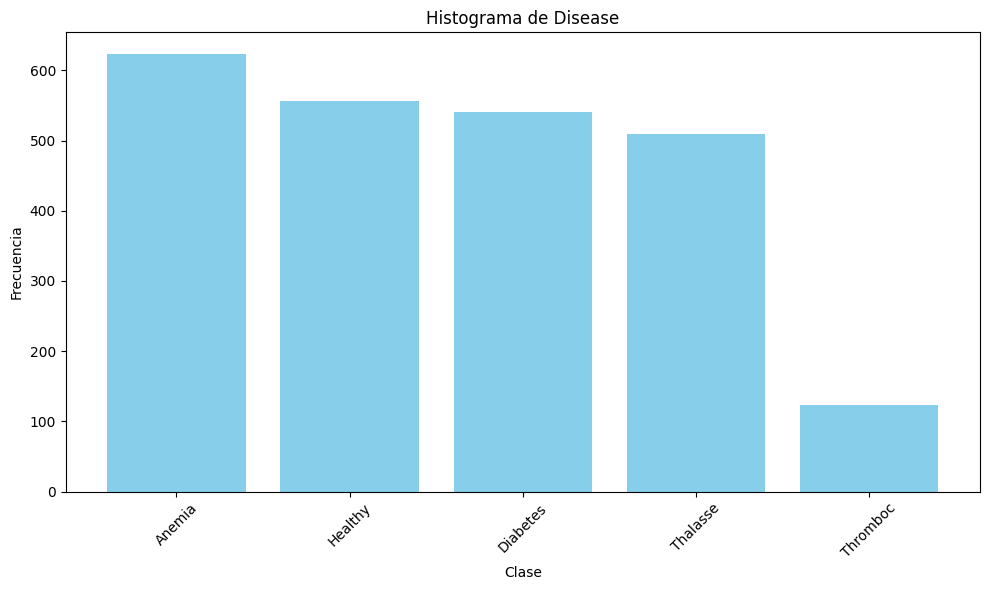

In [172]:

# Contar la frecuencia de cada clase
frecuencia_clases = df['Disease'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
plt.bar(frecuencia_clases.index, frecuencia_clases.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Histograma de Disease')

# Mostrar el histograma
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()


En este histograma se observa la frecuencia absoluta de cada clase de Disease en el dataframe. Esto nos permite ver si las 5 clases estan balanceadas. Se puede ver a simple vista que esto no es así, siendo anemia la clase con más muestras seguida de healthy, diabetes y thalasse. Por último encontramos Thromboc con mas de 300 muestras menos que el resto de clases.

Este suceso puede afectar y sesgar las predicciones de nuestro modelo de clasificación de Disease, ya que el modelo tendrá menos datos para aprender a diagnosticar a los enfermos de Thromboc en comparación a las otras enfermedades. Esto puede afectar a la capacidad predictiva del modelo. 

Para solventar esto se puede realizar un split estratificado de los datos para asegurarnos de obtener el mismo número de muestras por clase a la hora de entrenar, validar y testear el modelo.

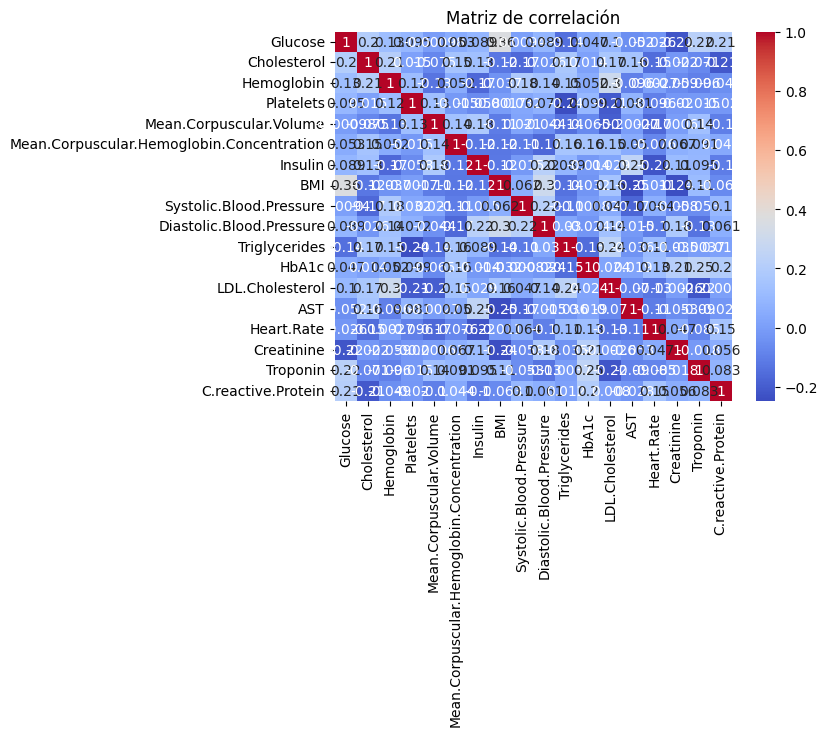

In [173]:


# Matriz de correlación
df_num = df.drop(['Disease'], axis = 1)
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


En esta matriz podemos ver si existe algun tipo de correlacion entre las variables numéricas que estamos estudiando.
En la mayoría de las variables esta correlación tiene valores muy cercanos a 0, indicando que no existe una correlación clara entre las variables. 
Las variables con valores de correlación más notables no superan el -0.2, que también es un valor muy cercano de 0 y no es suficiente para afirmar una correlación negativa significativa en nuestras variables.

## 3. Normalizar las expresiones con la transformación minmax <a class="anchor" id="3"></a>

Como hemos indicado anteriormente, todos los valores numéricos se encuentran dentro de el rango (0,1), por lo tanto no es necesario reescalar y normalizar los datos numéricos. En cambio, sí que será necesario hacer un encoding de la variable categórica 'Disease' para poder entrenar el modelo.

In [174]:
# Codificación one-hot con eliminación de la primera columna
df_encoded = pd.get_dummies(df, columns=['Disease'])

## 4.  Separar los datos en train (2/3) y test (1/3) <a class="anchor" id="4"></a>

In [175]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop(df_encoded.columns[18:], axis=1)  # Hacemos un drop de las columnas categoricas
y = df_encoded[df_encoded.columns[18:]]  # Seleccionamos las columnas categoricas

# Dividir los datos en conjuntos de entrenamiento y prueba (2/3 y 1/3 respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (1575, 18)
Forma de X_test: (776, 18)
Forma de y_train: (1575, 5)
Forma de y_test: (776, 5)


## 5.  Definir el modelo 1 <a class="anchor" id="5"></a>

In [176]:
input_shape = X.shape[1]
num_classes = len(df_encoded.columns[18:])

In [177]:

# Definir el modelo
modelo_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,)),  # Capa oculta densa con 10 nodos y activación ReLU
    tf.keras.layers.Dropout(0.3),  # Dropout del 30%
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida con activación softmax (suponiendo clasificación)
])

# Resumen del modelo
modelo_1.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                190       
                                                                 
 dropout_23 (Dropout)        (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 5)                 55        
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6. Ajustar el modelo 1 con un 20% de validacion <a class="anchor" id="6"></a>.

In [178]:
# Compilar el modelo
modelo_1.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Ajustar el modelo con 20% de validación y mostrar la curva de aprendizaje
historia = modelo_1.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)



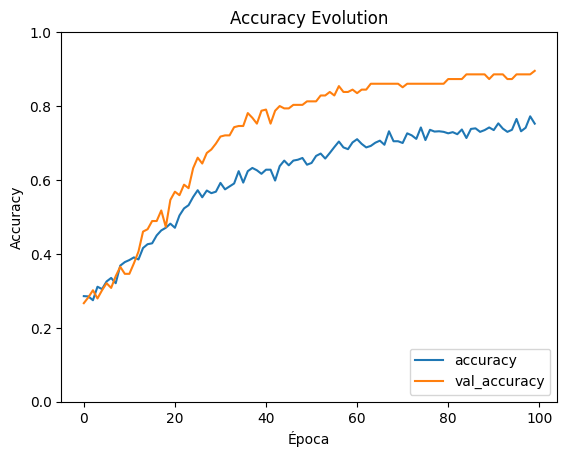

In [179]:
# Mostrar la curva de aprendizaje
plt.plot(historia.history['accuracy'], label='accuracy')
plt.plot(historia.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Este grafico nos permite monitorizar de forma visual la evolución de la precisión a lo largo del entrenamiento del modelo. Así podemos identificar rápidamente si el entrenamiento se está efectuando de forma correcta o si hay algún tipo de problema como podría ser el 'overfitting'.

El gráfico presenta oscilaciones tanto en el Train Accuracy (azul) como en el Validation Accuracy (naranja), pero la tendencia de ambas líneas es creciente siguiendo la forma de una función logarítmica y parece estancarse cerca del 0.8 de accuracy, aunque necesitaríamos más Epochs para verificarlo completamente.

Este entrenamiento parece ser correcto debido a que los pendientes de train accuracy y validation accuracy crecen proporcionalmente y se mantienen aproximadamente paralelas.

Se podría mejorar el entrenamiento modificando los parámetro,s como el learning rate o añadiendo más capas, para estabilizar las lineas y que no presentaran picos y oscilaciones tan repentinas, cosa que indicaría un entrenamiento más robusto y fiable.

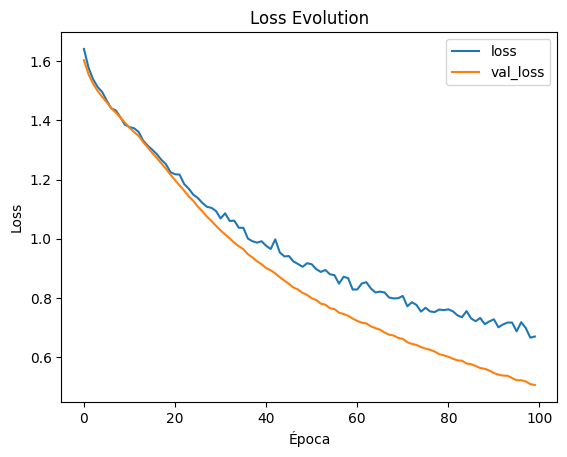

In [180]:
# Mostrar la curva de aprendizaje para la pérdida (loss)
plt.plot(historia.history['loss'], label='loss')
plt.plot(historia.history['val_loss'], label = 'val_loss')
plt.title('Loss Evolution')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Este grafico nos permite monitorizar de forma visual la evolución del error a lo largo del entrenamiento del modelo. Así podemos identificar rápidamente si el entrenamiento se está efectuando de forma correcta o si hay algún tipo de problema como podría ser el 'overfitting'.

El gráfico presenta oscilaciones tanto en el TraiLosscy (azul) como en el ValidatioLosscy (naranja), pero la tendencia de ambas líneas edecrecientete siguiendo la forma de una funcióexponencial negativaca y parecestabilizarsese cerca del 0.8 dlosscy, aunque necesitaríamos más Epochs para verificarly ver dónde exactamente el modelo ya no es capaz de disminuir el Losste.

Este entrenamiento parece ser correcto debido a que los pendientes de trlossracy y validatlossrdeacy crecen proporcionalm,te y se mantienen aproximadamente paral y van decreciendo a medida que avanzan las epochseiable.

## 7. Obtener la tabla de clasificación errónea en test <a class="anchor" id="7"></a>

25/25 [==============================] - 0s 1ms/step


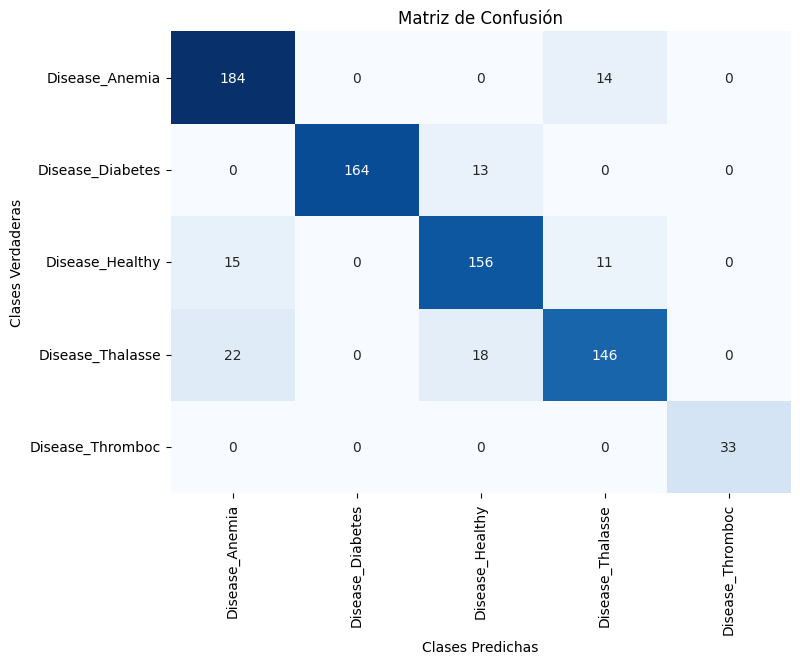

In [181]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo en el conjunto de prueba
predicciones = modelo_1.predict(X_test)

# Convertir las predicciones en etiquetas de clase (la clase con la probabilidad más alta)
clases_predichas = tf.argmax(predicciones, axis=1).numpy()

# Obtener las etiquetas verdaderas
etiquetas_verdaderas = tf.argmax(y_test, axis=1).numpy()

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, clases_predichas)

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=df_encoded.columns[18:], yticklabels=df_encoded.columns[18:])
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.title('Matriz de Confusión')
plt.show()



La matriz de confusión es una herramienta que nos permite visualizar el rendimiento de un modelo de clasificación al mostrar el número de predicciones correctas e incorrectas para cada clase. 
La primera fila nos muestra que el modelo clasifica correctamente 132 instancias de Anemia y hemos clasificado incorrectamente 35 instancias de esta clase en Healthy y 31 en Thalasse.

En la segunda fila el modelo clasifica correctamente 149 instancias de diabetis e incorrectamente 28 instancias pertenencientes a diabetis son clasificadas en Healthy.

En la tercera fila clasifica correctamente 136 instancias healty e incorrectamente 18 como anemia y 28 como diabetis.

En la cuarta fila clasifica correctamente 148 instancias de thalasse e incorrectamente 22 de healthy y 16 de anemia.

En la quinta fila clasifica correctamente 19 Thromboc e incorrectamente 14 instancias de thromboc son clasificadas en Thalasse
c".

Esta matriz de confusnos permite identificartaca los puntos débiles de nuestro modelo, ya que pres severasenta dificultades identificaAnemia y Thromboc ya que falla casi el 50% de las instancias en ambos casosumna.tes".

In [182]:
from sklearn.metrics import classification_report

# Mostrar el reporte de clasificación
cls_report = classification_report(etiquetas_verdaderas, clases_predichas,target_names = df_encoded.columns[18:])
print(cls_report)

                  precision    recall  f1-score   support

  Disease_Anemia       0.83      0.93      0.88       198
Disease_Diabetes       1.00      0.93      0.96       177
 Disease_Healthy       0.83      0.86      0.85       182
Disease_Thalasse       0.85      0.78      0.82       186
Disease_Thromboc       1.00      1.00      1.00        33

        accuracy                           0.88       776
       macro avg       0.90      0.90      0.90       776
    weighted avg       0.88      0.88      0.88       776



Este reporte proporciona información detallada sobre la precisión (precision), exhaustividad (recall), puntuación F1 (F1-score) y soporte para cada clase, así como la precisión global del modelo (accuracy) y promedios ponderados y no ponderados de estas métricas.

La precisión general del modelo es de 75% que es bastante alta, aunque se podría conseguir mejorar esta métrica con una optimización de parámetros exhaustiva con algún framework de hyperparameter tunning como Optuna.

Cabe destacar el caso de Disease_Thromboc: en la matriz de confusión hemos visto que esta categoría era clasificada incorrectamente casi un 50% de las veces. ¿Cómo puede tener un 100% de precisión el modelo?. La razón detrás de esto es que la precisión se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos positivos. En este caso, hay 19 verdaderos positivos y 0 falsos positivos para la clase "Disease_Thromboc". Por lo tanto, la precisión se calcula como 19 / (19 + 0) = 1.00, lo que da como resultado una precisión del 100%.

Sin embargo, la precisión no cuenta la historia completa en este caso. Aunque la precisión es alta, el recall (exhaustividad) para la clase "Disease_Thromboc" es del 58%, lo que indica que solo se identificaron correctamente el 58% de todas las muestras verdaderas de "Disease_Thromboc". Esto significa que el modelo no pudo identificar aproximadamente la mitad de las muestras reales de "Disease_Thromboc".

Por lo tanto, aunque la precisión puede ser alta, es importante considerar otras métricas como el recall para obtener una comprensión completa del rendimiento del modelo en la clasificación de cada clase.

## 8. Definir el modelo 2 <a class="anchor" id="8"></a>

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir el modelo
modelo_2 = Sequential([
    # Primera capa oculta densa con 10 nodos y activación relu
    Dense(10, activation='relu', input_shape=(input_shape,)),
    # Dropout del 30% para reducir el sobreajuste
    Dropout(0.3),
    # Segunda capa oculta densa con 10 nodos y activación relu
    Dense(10, activation='relu'),
    # Dropout del 30%
    Dropout(0.3),
    # Capa de salida con activación sigmoide para la clasificación binaria
    Dense(num_classes, activation='softmax')
])

# Mostrar el summary del modelo
modelo_2.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                190       
                                                                 
 dropout_24 (Dropout)        (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_47 (Dense)            (None, 5)                 55        
                                                                 
Total params: 355 (1.39 KB)
Trainable params: 355 (1.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 9. Ajustar el modelo 2 con un 20% de validación <a class="anchor" id="9"></a>

In [184]:
# Compilar el modelo
modelo_2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Ajustar el modelo con 20% de validación y mostrar la curva de aprendizaje
historia_2 = modelo_1.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

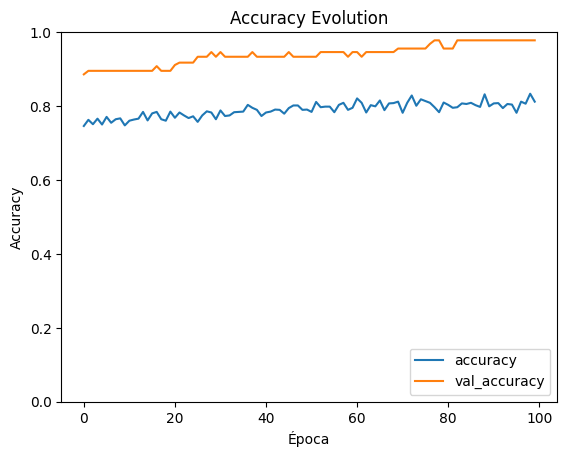

In [190]:
# Mostrar la curva de aprendizaje
plt.plot(historia_2.history['accuracy'], label='accuracy')
plt.plot(historia_2.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Podemos observar que tanto la train accuracy como la validation accuracy presentan oscilaciones a lo largo de las épocas y que no llegan a estabilizarse. Además, el patrón general de las oscilaciones parece dibujar una recta, cuando lo que deberíamos observar pese a algunas oscilaciones, es un patrón de curva ascendente que se estabiliza en las últimas épocas. Esto indicaría que el modelo está aumentando su accuracy con las épocas, ya que va aprendiendo a medida que avanza el entrenamiento. 

El gráfico actual nos demuestra que este modelo no ha sido capaz de aprender a hacer predicciones a partir de los datos mediante un entrenamiento, ya que sus métricas de accuracy son aproximadamente las mismas al inicio y al final del entrenamiento.

La linea totalmetne plana y con pendiente igual a 0 de Validation Accuracy nos indica que el modelo está siendo afectado por el 'overfitting'. Podemos inferir esta conclusión debido a que al aumentar la complejidad del modelo, este presenta unas metricas de precision muy altas, pero no parece haber ninguna curva de aprendizaje, por lo tanto el modelo no está aprendiendo a partir de los datos, simplemente se los está memorizando sin aprender a generalizar, ya que es un modelo demasiado complejo para esta tarea y necesita o más datos, o reducir la complejidad del modelo.

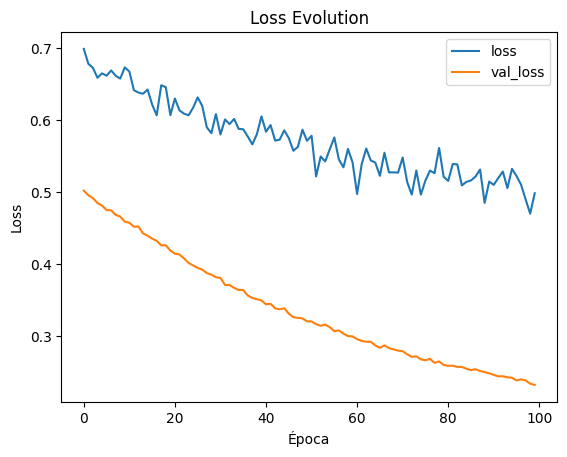

In [189]:
# Mostrar la curva de aprendizaje para la pérdida (loss)
plt.plot(historia_2.history['loss'], label='loss')
plt.plot(historia_2.history['val_loss'], label = 'val_loss')
plt.title('Loss Evolution')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Lo mismo podemos ver en este gráfico, donde deberíamos observar una curva con pendiente negativo que indicaría la disminución del error conforme avanza el entrenamiento y se estabilizaría cerca del 0 en las últimas épocas. Pero como podemos comprobar, la tendencia de estos dos gráficos es muy oscilatoria y oscilan en un patrón descendiente con un pendiente negativo muy pequeño, por lo tanto el modelo no está reduciendo el Loss de forma eficiente y no está aprendiendo a partir de los datos que le estamos proporcionando para el entrenamiento.

## 10. Comparar en test, mediante las métricas de evaluación, los dos modelos. <a class="anchor" id="10"></a>

25/25 [==============================] - 0s 1ms/step


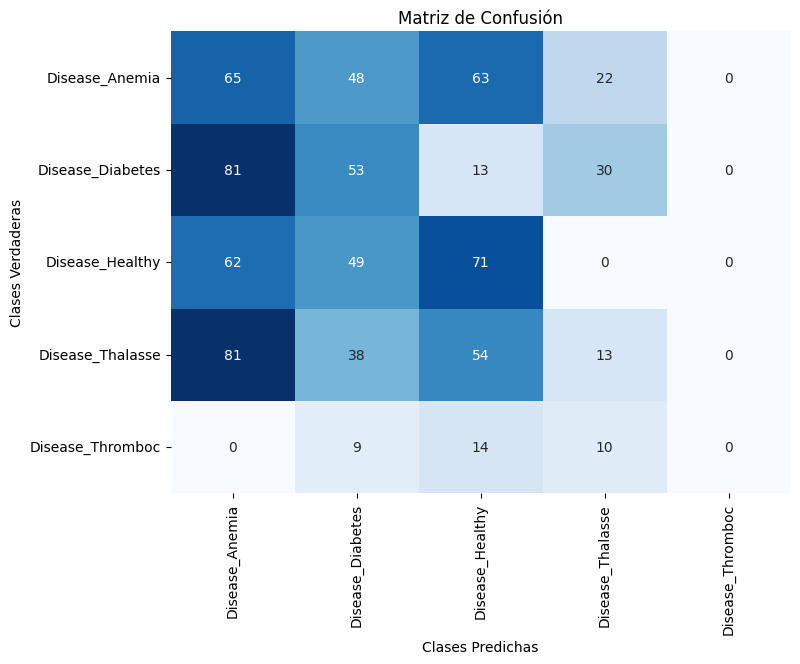

In [187]:
# Obtener las predicciones del modelo_2 en el conjunto de prueba
predicciones_2 = modelo_2.predict(X_test)

# Convertir las predicciones en etiquetas de clase (la clase con la probabilidad más alta)
clases_predichas_2 = tf.argmax(predicciones_2, axis=1).numpy()

# Obtener las etiquetas verdaderas
etiquetas_verdaderas = tf.argmax(y_test, axis=1).numpy()

# Calcular la matriz de confusión
matriz_confusion_2 = confusion_matrix(etiquetas_verdaderas, clases_predichas_2)

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_2, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=df_encoded.columns[18:], yticklabels=df_encoded.columns[18:])
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [188]:
# Mostrar el reporte de clasificación
cls_report_2 = classification_report(etiquetas_verdaderas, clases_predichas_2,target_names = df_encoded.columns[18:])
print(cls_report_2)

                  precision    recall  f1-score   support

  Disease_Anemia       0.22      0.33      0.27       198
Disease_Diabetes       0.27      0.30      0.28       177
 Disease_Healthy       0.33      0.39      0.36       182
Disease_Thalasse       0.17      0.07      0.10       186
Disease_Thromboc       0.00      0.00      0.00        33

        accuracy                           0.26       776
       macro avg       0.20      0.22      0.20       776
    weighted avg       0.24      0.26      0.24       776



C:\Users\Usuario\miniconda3\envs\tf_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\tf_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\tf_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En la matriz de confusión y en el classification report del modelo 2 podemos ver que pese a ser un modelo más complejo con 110 más parámetros entrenables este modelo consigue una accuracy general del 24%, muy baja en comparación a su predecesor (modelo 1) con una accuracy del 75%. 

Si comparamos las accuracies de ambos modelos para cada una de las clases vemos que el modelo 1 es muy superior en todas ellas respecto al modelo 2 que siempre está como mínimo un 40% por debajo en accuracy.

Estos resultados nos indican, como ya se ha comentado anteriormente, que los modelos más complejos no siempre resultan en mejores predicciones y rendimiento, ya que cuanto más complejo es un modelo, más riesgo de sobreentrenamiento hay. Cada modelo, por simple que sea, puede ser de gran utilidad y óptimo si se usa en la situación adecuada con los parámetros correspondientes. 